# Information Quantities for Decision Tree
In this notebook, we will use the [`dit` package](https://dit.readthedocs.io/en/latest/) to compute some basic information quantities used in the decision tree algorithms. A quick reference of Shannon's information measures are given in the last section.

Install and load required packages.

In [0]:
!pip install dit # install the package

In [0]:
import dit       # load the package
from dit.shannon import entropy, conditional_entropy, mutual_information
from IPython.display import display, Markdown, Math, HTML # To pretty print on screen.
import matplotlib.pyplot as plt

The following is needed for rending Mathjax in Colab output cells. (Click [here](https://github.com/googlecolab/colabtools/issues/594) for details.)

In [0]:
def typeset():
  """MathJax initialization for the current cell.
  """
  display(HTML('''
    <script src='https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=TeX-AMS_HTML-full,Safe&delayStartupUntil=configured'></script>
    <script>
        (() => {
          const mathjax = window.MathJax;
          mathjax.Hub.Config({
          'tex2jax': {
            'inlineMath': [['$', '$'], ['\\(', '\\)']],
            'displayMath': [['$$', '$$'], ['\\[', '\\]']],
            'processEscapes': true,
            'processEnvironments': true,
            'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
            'displayAlign': 'center',
          },
          'HTML-CSS': {
            'styles': {'.MathJax_Display': {'margin': 0}},
            'linebreaks': {'automatic': true},
            // Disable to prevent OTF font loading, which aren't part of our
            // distribution.
            'imageFont': null,
          },
          'messageStyle': 'none'
        });
        mathjax.Hub.Configured();
      })();
      </script>
      '''))

## Entropy of a distribution

Create a distribution:
\begin{align}
p_k=\begin{cases}
\frac12 & k=0\\
\frac14 & k=1,2\\
0 & \text{otherwise.}
\end{cases}
\end{align}

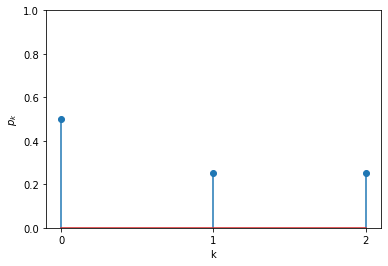

In [0]:
p = dit.Distribution(['0', '1', '2', '3'], [1/2, 1/4, 1/4, 0])

plt.stem(p.outcomes,p.pmf,use_line_collection=True)
plt.xlabel('k')
plt.ylabel(r'$p_k$')
plt.ylim((0,1))
plt.show()

The entropy of the distribution can be computed as follows:

In [0]:
typeset()
display(Math(r'h(p_1,p_2,\dots)={}'.format(entropy(p))))

<IPython.core.display.Math object>

## Quality of splitting attributes

Dataset $D$ from the lecture (Slide 19).

|$X_1$|$X_2$|$X_3$|$X_4$|$Y$|
|-----|-----|-----|-----|---|
|0    |0    |0    |00   |0  |
|0    |0    |0    |00   |0  |
|0    |0    |1    |01   |1  |
|1    |0    |1    |11   |1  |
|0    |1    |0    |00   |2  |
|1    |1    |0    |10   |2  |
|1    |1    |1    |11   |3  |
|1    |1    |1    |11   |3  |

Create a uniform distribution over the instances in $D$.

In [0]:
d = dit.uniform([('0','0','0','00','0'),
                 ('0','0','0','00','0'),
                 ('0','0','1','01','1'),
                 ('1','0','1','11','1'),
                 ('0','1','0','00','2'),
                 ('1','1','0','10','2'),
                 ('1','1','1','11','3'),
                 ('1','1','1','11','3')])
d.set_rv_names(('X1','X2','X3','X4','Y'))
d

Calculate $\text{Info}(D)$ and $\text{Info}_{X_i}(D)$ for $i=\{1,2,3,4\}$ as the entropy $H(Y)$ and conditional entropies $H(Y|X_i)$'s respectively. 

In [0]:
InfoD = entropy(d,['Y'])
InfoX1D = conditional_entropy(d,['Y'],['X1'])
InfoX2D = conditional_entropy(d,['Y'],['X2'])
InfoX3D = conditional_entropy(d,['Y'],['X3'])
InfoX4D = conditional_entropy(d,['Y'],['X4'])

In [0]:
typeset()
Math(r'''
\begin{{aligned}}
\text{{Info}}(D)&={}\\
\text{{Info}}_{{X_1}}(D)&={:.3g}\\
\text{{Info}}_{{X_2}}(D)&={:.3g}\\
\text{{Info}}_{{X_3}}(D)&={:.3g}\\
\text{{Info}}_{{X_4}}(D)&={:.3g}\\
\end{{aligned}}
'''.format(InfoD,InfoX1D,InfoX2D,InfoX3D,InfoX4D))

<IPython.core.display.Math object>

Calculate $\text{SplitInfo}_{X_i}(D)$ as $H(X_i)$.

In [0]:
SplitInfoX1D = entropy(d,['X1'])
SplitInfoX2D = entropy(d,['X2'])
SplitInfoX3D = entropy(d,['X3'])
SplitInfoX4D = entropy(d,['X4'])

In [0]:
typeset()
Math(r'''
\begin{{aligned}}
\text{{SplitInfo}}_{{X_1}}(D)&={:.3g}\\
\text{{SplitInfo}}_{{X_2}}(D)&={:.3g}\\
\text{{SplitInfo}}_{{X_3}}(D)&={:.3g}\\
\text{{SplitInfo}}_{{X_4}}(D)&={:.3g}\\
\end{{aligned}}
'''.format(SplitInfoX1D,SplitInfoX2D,SplitInfoX3D,SplitInfoX4D))

<IPython.core.display.Math object>

Calculate the information gain $\text{Gain}_{X_i}(D)$ as the mutual information $I(X_i;Y):=H(Y)-H(Y|X_i)$.

In [0]:
GainX1D = mutual_information(d,['X1'],['Y'])
GainX2D = mutual_information(d,['X2'],['Y'])
GainX3D = mutual_information(d,['X3'],['Y'])
GainX4D = mutual_information(d,['X4'],['Y'])

In [0]:
typeset()
Math(r'''
\begin{{aligned}}
\text{{Gain}}_{{X_1}}(D)&={:.3g}\\
\text{{Gain}}_{{X_2}}(D)&={:.3g}\\
\text{{Gain}}_{{X_3}}(D)&={:.3g}\\
\text{{Gain}}_{{X_4}}(D)&={:.3g}\\
\end{{aligned}}
'''.format(GainX1D,GainX2D,GainX3D,GainX4D))

<IPython.core.display.Math object>

Calculate the information gain ratios:

In [0]:
typeset()
Math(r'''
\begin{{aligned}}
\frac{{\text{{Gain}}_{{X_1}}(D)}}{{\text{{SplitInfo}}_{{X_1}}(D)}}&={:.3g}\\
\frac{{\text{{Gain}}_{{X_2}}(D)}}{{\text{{SplitInfo}}_{{X_2}}(D)}}&={:.3g}\\
\frac{{\text{{Gain}}_{{X_3}}(D)}}{{\text{{SplitInfo}}_{{X_3}}(D)}}&={:.3g}\\
\frac{{\text{{Gain}}_{{X_4}}(D)}}{{\text{{SplitInfo}}_{{X_4}}(D)}}&={:.3g}\\
\end{{aligned}}
'''.format(GainX1D/SplitInfoX1D,GainX2D/SplitInfoX2D,GainX3D/SplitInfoX3D,GainX4D/SplitInfoX4D))

<IPython.core.display.Math object>

## A summary of Shannon's information measures

Definitions:

\begin{align}
H(Y) &= E\left[\log \tfrac1{P_{Y}(Y)}\right] && \text{entropy of $Y$}\\
H(Y|X) &= E\left[\log \tfrac1{P_{Y|X}(Y|X)}\right] && \text{conditional entropy of $Y$ given $X$}\\
I(X;Y) &= E\left[\log \tfrac{P_{Y|X}(Y|X)}{P_Y(Y)}\right] && \text{mutual information of $X$ and $Y$}\\
\end{align}

Relationships among the information mesaures:

\begin{align}
H(X,Y)&=H(X)+H(Y|X) && \text{chain rule of entropy}\\
&=H(Y)+H(X|Y)\\
I(X;Y)&=H(Y)-H(Y|X) && \text{equivalent definitions of mutual information in terms of entropies}\\
&=H(X)+H(Y)-H(X,Y)\\
&=H(X)-H(X|Y)
\end{align}

![Information diagram](https://upload.wikimedia.org/wikipedia/commons/d/d4/Entropy-mutual-information-relative-entropy-relation-diagram.svg)